## Downloading Dataset From Kaggle

In [2]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!kaggle datasets download -d chitwanmanchanda/fraudulent-transactions-data


Dataset URL: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data
License(s): CC0-1.0
fraudulent-transactions-data.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extracting Dataset from  ZipFile

In [4]:
# importing the zipfile module 
from zipfile import ZipFile 

# loading the temp.zip and creating a zip object 
with ZipFile("fraudulent-transactions-data.zip", 'r') as zObject: 
	zObject.extractall() 


## Data preprocessing

In [5]:

import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("Fraud.csv")

In [7]:
df.shape

(6362620, 11)

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [10]:
# checking data Types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# checking for duplicate values
df[df.duplicated()].count()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As their is no null values,and no duplicates found  we can move forward without worrying about data irregularites. In the next step lest check about ouliers and multi-collinearity  between variable

## Variable Correlation

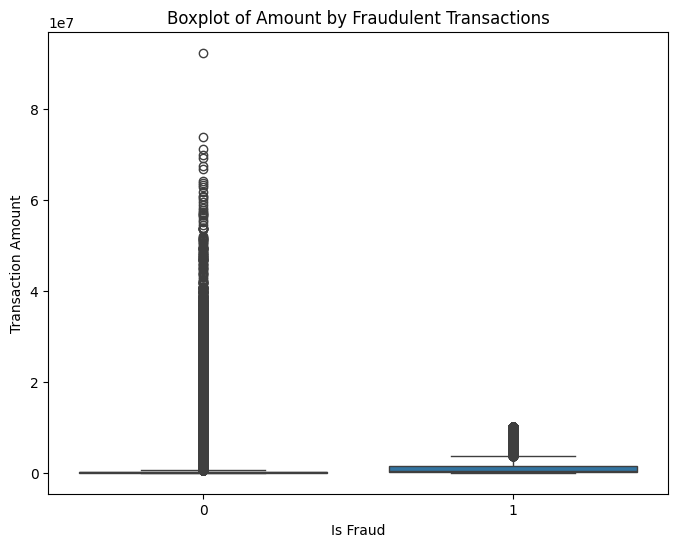

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Boxplot of Amount by Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

This plot shows how the transaction amount varies between fraudulent and non-fraudulent transactions.

C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


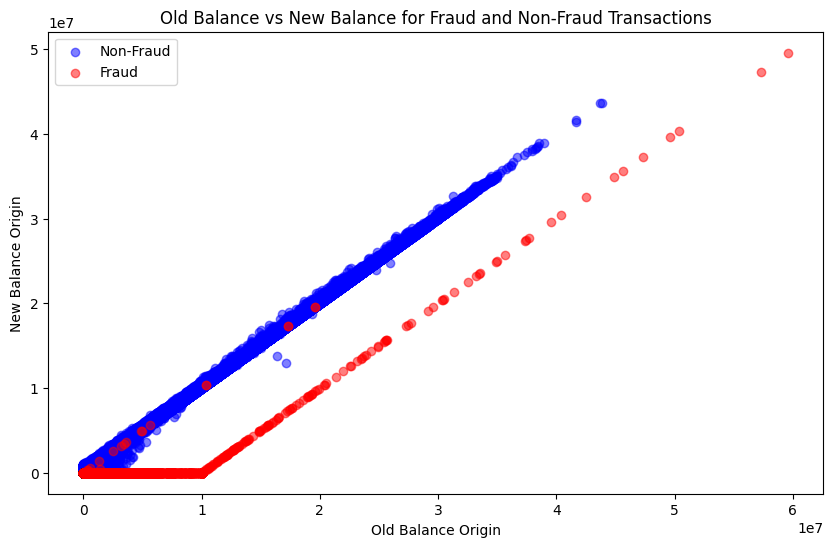

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['isFraud'] == 0]['oldbalanceOrg'], df[df['isFraud'] == 0]['newbalanceOrig'], alpha=0.5, label='Non-Fraud', c='blue')
plt.scatter(df[df['isFraud'] == 1]['oldbalanceOrg'], df[df['isFraud'] == 1]['newbalanceOrig'], alpha=0.5, label='Fraud', c='red')

plt.title('Old Balance vs New Balance for Fraud and Non-Fraud Transactions')
plt.xlabel('Old Balance Origin')
plt.ylabel('New Balance Origin')
plt.legend()
plt.show()

This scatter plot shows the relationship between the original balance before the transaction and the new balance after the transaction for fraudulent and non-fraudulent cases.

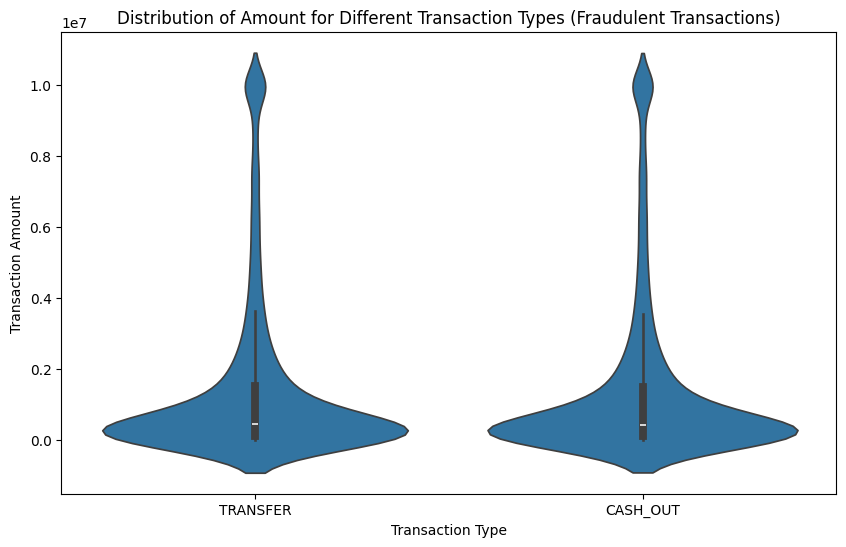

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='amount', data=df[df['isFraud'] == 1])
plt.title('Distribution of Amount for Different Transaction Types (Fraudulent Transactions)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

This plot shows how transaction types (e.g., CASH_OUT, TRANSFER) are distributed for fraudulent transactions.

## Outlier detection

In [20]:

from scipy import stats
# Z-score calculation for 'amount'
df['zscore_amount'] = np.abs(stats.zscore(df['amount']))

# Identify outliers where Z-score is greater than 3
outliers = df[df['zscore_amount'] > 3]
print(f"Number of outliers in 'amount': {len(outliers)}")

Number of outliers in 'amount': 44945


C:\Users\asus\AppData\Local\Temp\ipykernel_13364\268780771.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


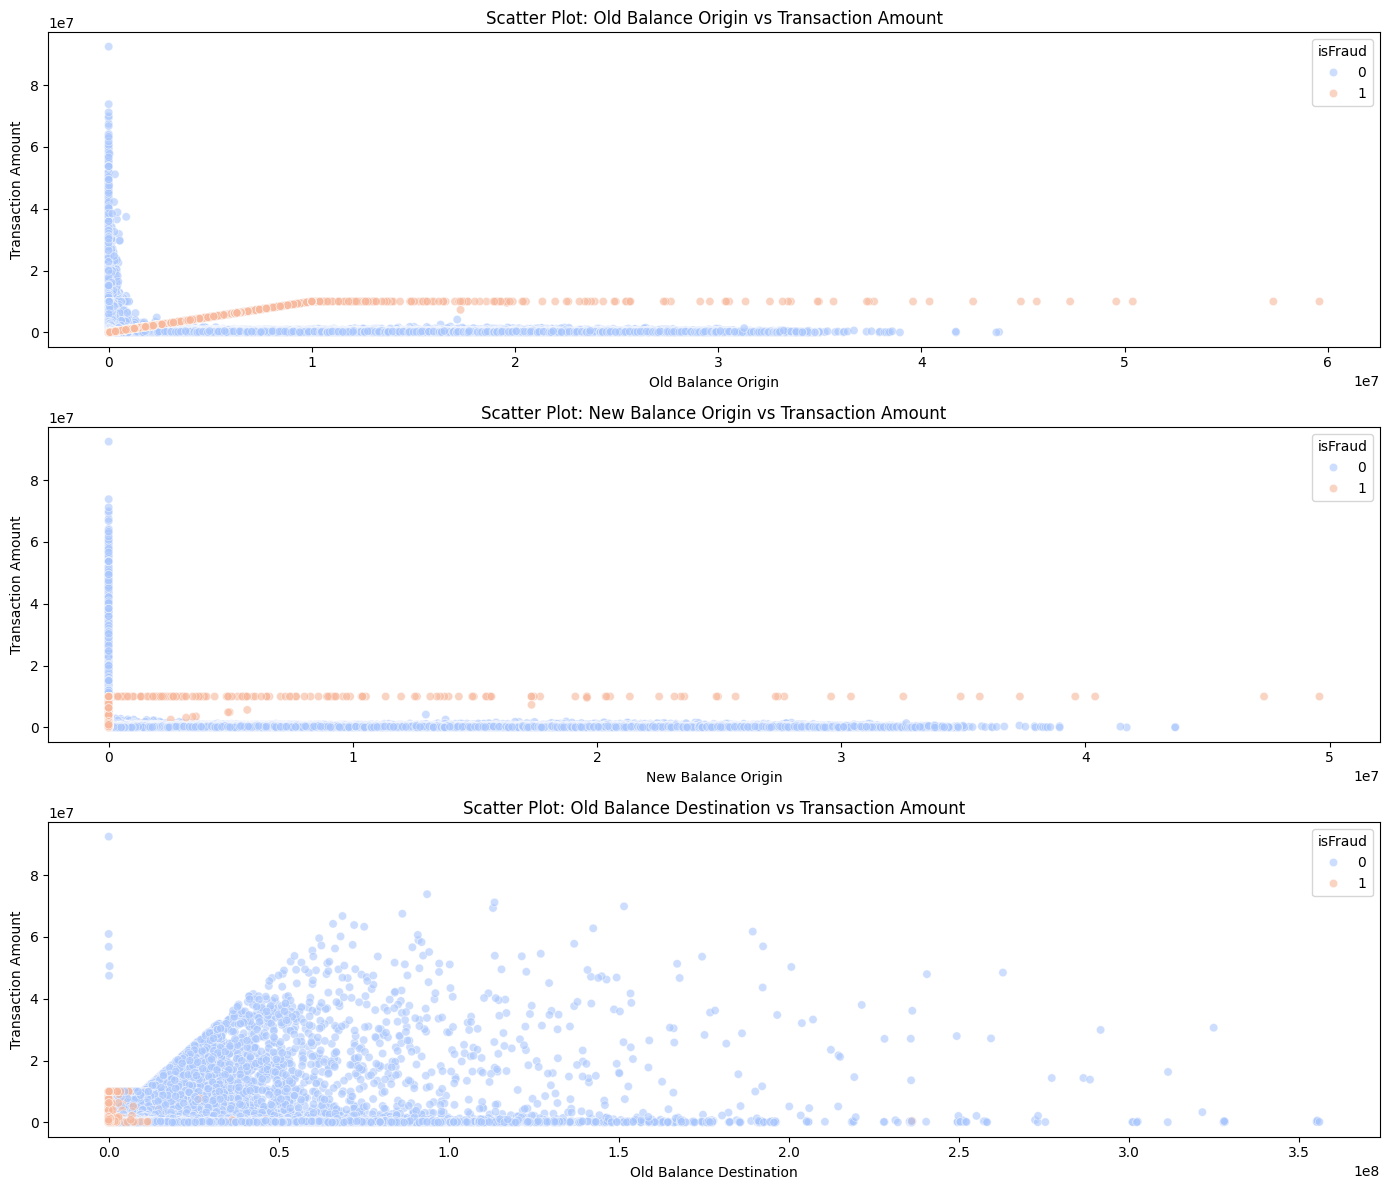

In [21]:


# Create a figure to hold multiple subplots
plt.figure(figsize=(14, 12))

# Plot 1: Amount vs OldbalanceOrg
plt.subplot(3, 1, 1)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df, hue='isFraud', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot: Old Balance Origin vs Transaction Amount')
plt.xlabel('Old Balance Origin')
plt.ylabel('Transaction Amount')

# Plot 2: Amount vs NewbalanceOrig
plt.subplot(3, 1, 2)
sns.scatterplot(x='newbalanceOrig', y='amount', data=df, hue='isFraud', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot: New Balance Origin vs Transaction Amount')
plt.xlabel('New Balance Origin')
plt.ylabel('Transaction Amount')

# Plot 3: Amount vs OldbalanceDest
plt.subplot(3, 1, 3)
sns.scatterplot(x='oldbalanceDest', y='amount', data=df, hue='isFraud', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot: Old Balance Destination vs Transaction Amount')
plt.xlabel('Old Balance Destination')
plt.ylabel('Transaction Amount')

# Show the plot
plt.tight_layout()
plt.show()


To show a plot between relevant variables for fraud detection and detect outliers, we can focus on variables that are most important in fraud detection, such as:

- Amount (the transaction amount)
- OldbalanceOrg (initial balance before the transaction)
- NewbalanceOrg (balance after the transaction)
- OldbalanceDest (initial balance of the recipient)
- NewbalanceDest (balance of the recipient after the transaction)
We'll use scatter plots to visualize relationships between these variables and identify outliers.

The scatter plots will highlight potential outliers in the dataset, such as transactions where the amount is disproportionately high compared to the sender's balance, or where balances are significantly altered.

In [23]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

In [22]:
X = df[df['nameDest'].str.contains('M')]
X.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,zscore_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0,0.281560
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0,0.294767
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0,0.278532
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0,0.284908
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0,0.286084
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0,0.284836
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.0,0,0,0.291190
11,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.0,0,0,0.292721
12,1,PAYMENT,2560.74,C1648232591,5070.00,2509.26,M972865270,0.0,0.0,0,0,0.293614
13,1,PAYMENT,11633.76,C1716932897,10127.00,0.00,M801569151,0.0,0.0,0,0,0.278589


In [35]:
# make a copy of original dataset
new_df = df.copy()
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,zscore_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.281560
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.294767
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.297555
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.297555
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.278532
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.264665
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,10.153953
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,10.153953
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1.109765


In [36]:
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,zscore_amount
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.281560
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.294767
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.297555
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.297555
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.278532
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.264665
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,10.153953
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,10.153953
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1.109765


In [37]:
new_df['isMerchant'] = new_df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)
new_df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)  # Drop these columns


discard the original nameOrig and nameDest columns, as they are categorical and do not add value directly.

In [38]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
le = LabelEncoder()
new_df['type']=le.fit_transform(df['type'].astype(str)) # one hot encoding "type" column

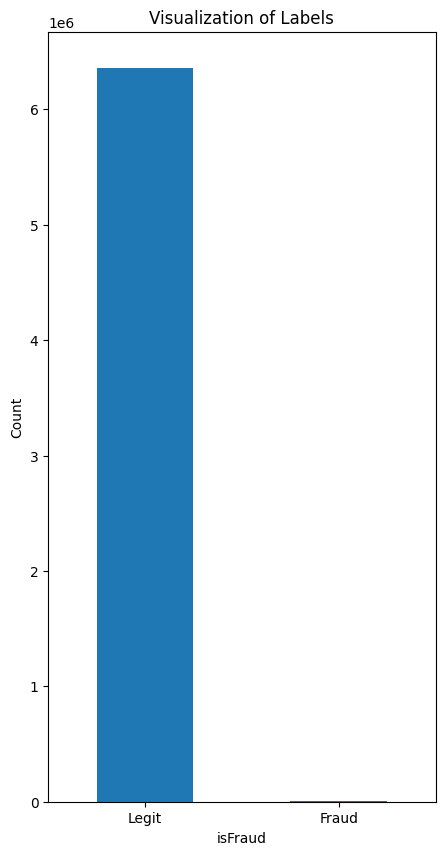

In [39]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## Multi-Collinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)


In [41]:
calc_vif(new_df)

,variables,VIF
0,step,2.299843
1,type,5.254004
2,amount,42.367785
3,oldbalanceOrg,599.664347
4,newbalanceOrig,605.092612
5,oldbalanceDest,74.964592
6,newbalanceDest,86.898256
7,isFraud,1.199192
8,isFlaggedFraud,1.002642
9,zscore_amount,41.038590


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

## Feature Engineering

In [42]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,4.137265
1,amount,40.810692
2,isFraud,1.183268
3,isFlaggedFraud,1.002574
4,zscore_amount,40.259869
5,isMerchant,5.689782
6,Actual_amount_orig,1.314560
7,Actual_amount_dest,3.810101


## Visualization of Multi-Collinearity

<Axes: >

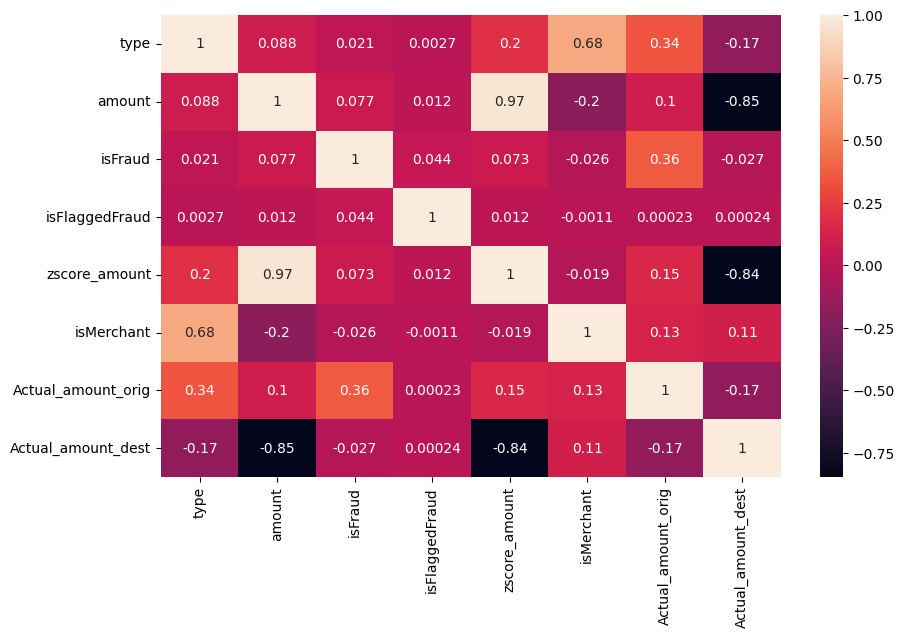

In [43]:
corr=new_df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

I suggest using Gradient Boosting (XGBoost)  as it handles class imbalance well and performs strongly on tabular datasets like this. The model learns the fraudulent patterns based on features like transaction amount, type, and account balances before and after the transaction.

Key steps:

Feature Selection: Use features like amount, type, oldbalanceOrg, newbalanceOrg, oldbalanceDest, newbalanceDest, and encode the transaction type.
Model Training: Train using XGBoost, LightGBM, or any other Gradient Boosting method.
Evaluation: Evaluate with metrics like precision, recall, and F1-score to ensure you are detecting fraudulent transactions accurately.

We also using Descision Tree Due to following Characteristics:
The Decision Tree model is a great choice for your fraud detection problem because:

- It can handle the complex, non-linear relationships that are often present in fraud data.
- It easily manages both categorical and numerical data.
- It is highly interpretable, making it easier to explain the model's decisions to stakeholders.
- It can be tuned to handle imbalanced datasets, which is crucial in fraud detection scenarios.

## Model Training

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , accuracy_score
from imblearn.over_sampling import SMOTE

In [45]:
smote= SMOTE()
scaler = StandardScaler()

### Scaler Normalization 

In [46]:

new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

In [47]:
Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)
X_resampled, y_resampled = smote.fit_resample(X, Y)

### Splitting Dataset

In [48]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X_resampled, y_resampled, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (8896169, 7)
Shape of X_test:  (3812645, 7)


### Model fitting with Decision Tree

In [49]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, Y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(Y_test, y_pred_dt))
print("\nConfusion Matrix - Decision Tree\n", confusion_matrix(Y_test, y_pred_dt))
print("\nClassification Report - Decision Tree:\n", classification_report(Y_test, y_pred_dt))
confusion_matrix_dt = confusion_matrix(Y_test, y_pred_dt.round())

Decision Tree Accuracy: 0.9747975486833943

Confusion Matrix - Decision Tree
 [[1855811   50498]
 [  45590 1860746]]

Classification Report - Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97   1906309
           1       0.97      0.98      0.97   1906336

    accuracy                           0.97   3812645
   macro avg       0.97      0.97      0.97   3812645
weighted avg       0.97      0.97      0.97   3812645



### Model fitting with XGBoost

In [50]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train the model
xgb_model.fit(X_train_scaled, Y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(Y_test, y_pred_xgb))
print("\nConfusion Matrix - XGBoost\n", confusion_matrix(Y_test, y_pred_xgb))
print("\nClassification Report - XGBoost\n", classification_report(Y_test, y_pred_xgb))
confusion_matrix_xbg = confusion_matrix(Y_test, y_pred_xgb.round())

C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [22:48:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9796246437840397

Confusion Matrix - XGBoost
 [[1834049   72260]
 [   5424 1900912]]

Classification Report - XGBoost
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906309
           1       0.96      1.00      0.98   1906336

    accuracy                           0.98   3812645
   macro avg       0.98      0.98      0.98   3812645
weighted avg       0.98      0.98      0.98   3812645



Here Accuracy of Both the model are nearly equal lets fine tune the XGboost with Hyper Parameter Tuning

##  Model Evaluation

In [51]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix -XGB

print("TP,FP,TN,FN - XGB")
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_xgb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1860746
False Positives: 50498
True Negatives: 1855811
False Negatives: 45590
----------------------------------------------------------------------------------------
TP,FP,TN,FN - XGB
True Positives: 1900912
False Positives: 72260
True Negatives: 1834049
False Negatives: 5424


### Hyper parameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9]
}
# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

# Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)
print("XGBoost Best Accuracy:", accuracy_score(Y_test, y_pred_best_xgb))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\asus\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [23:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 200}
XGBoost Best Accuracy: 0.9809518064231


XGBoost Best accuracy after fine tuning become 98%

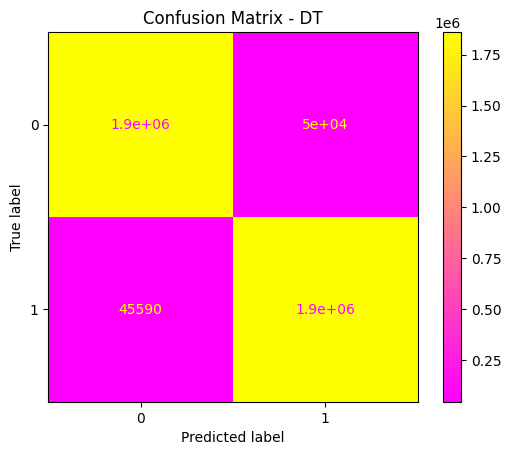

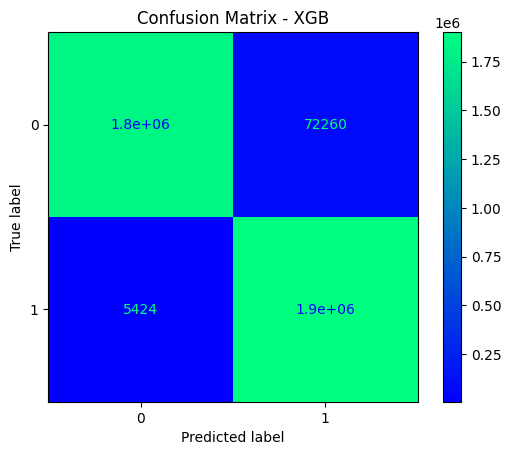

In [55]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot(colorbar="True",cmap="spring")
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xbg)
disp.plot(colorbar='True',cmap="winter")
plt.title('Confusion Matrix - XGB')
plt.show()

## Classification report

### Report of Decision tree

Precision: 0.9650
Recall: 0.9969
F1-Score: 0.9807


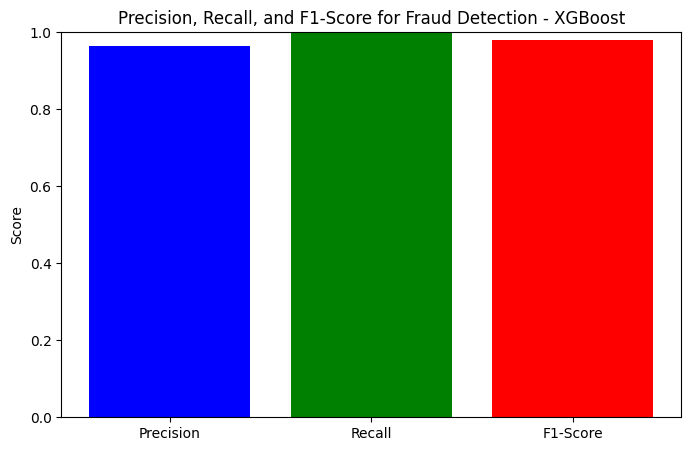

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report and extract metrics
report = classification_report(Y_test, y_pred_best_xgb, output_dict=True)

# Extract precision, recall, and F1-score for fraud class (1)
precision_XGB = report['1']['precision']
recall_XGB = report['1']['recall']
f1_score_XGB = report['1']['f1-score']

# Print the metrics
print(f'Precision: {precision_XGB:.4f}')
print(f'Recall: {recall_XGB:.4f}')
print(f'F1-Score: {f1_score_XGB:.4f}')

# Plot the metrics
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision_XGB, recall_XGB, f1_score_XGB]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores,color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Fraud Detection - XGBoost')
plt.show()


### Report of XGBoost

Precision: 0.9733
Recall: 0.9758
F1-Score: 0.9746


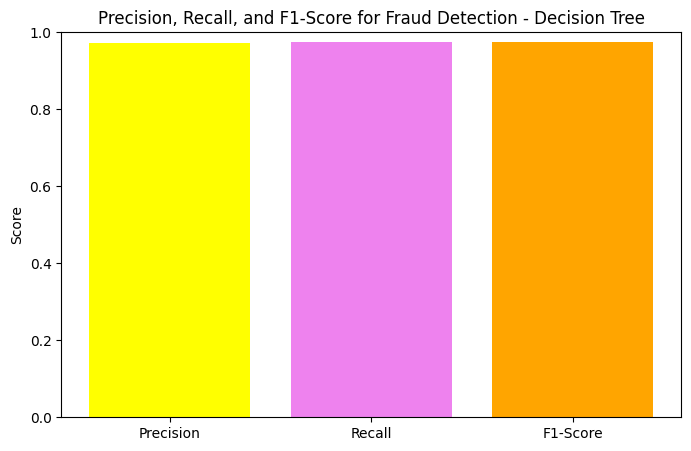

In [38]:

# Get classification report and extract metrics
report = classification_report(Y_test, y_pred_dt, output_dict=True)

# Extract precision, recall, and F1-score for fraud class (1)
precision_DT = report['1']['precision']
recall_DT = report['1']['recall']
f1_score_DT = report['1']['f1-score']

# Print the metrics
print(f'Precision: {precision_DT:.4f}')
print(f'Recall: {recall_DT:.4f}')
print(f'F1-Score: {f1_score_DT:.4f}')

# Plot the metrics
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision_DT, recall_DT, f1_score_DT]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['yellow', 'violet', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Fraud Detection - Decision Tree')
plt.show()


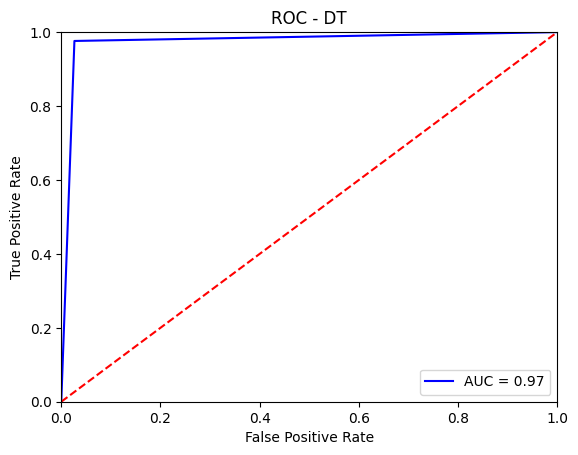

In [56]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve , auc
fpr, tpr, threshold = roc_curve(Y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


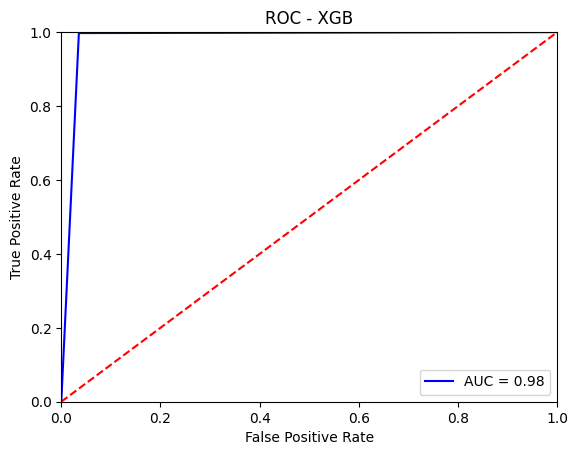

In [57]:
fpr, tpr, threshold = roc_curve(Y_test, y_pred_best_xgb)
roc_auc = auc(fpr, tpr)

plt.title('ROC - XGB')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is nearly equal, so both models are pretty good at what they do.

## Result

We observed that while the **accuracy** of both **XG Boost** and **Decision Tree** models is the same, the **precision** of XG Boost is higher. Precision is crucial in a fraud detection model because our primary goal is to correctly identify fraudulent transactions, rather than just correctly predicting normal ones. It’s essential that fraud cases are accurately detected while minimizing false positives—catching innocent transactions as fraud or missing actual fraud would undermine the system.

This focus on precision is one of the key reasons for using **XG Boost** and **Decision Tree** models over other algorithms in this context. Additionally, the choice of these models stems from the highly **imbalanced nature of the dataset** (Legit: Fraud :: 99.87:0.13).

What are the key factors that predict fraudulent customer?

Based on the trained model and feature importance, factors that may predict fraud include:

- Large transaction amounts
- Suspicious account balances (large differences between oldbalanceOrg and newbalanceOrg, and between oldbalanceDest and newbalanceDest)
- Transaction type: Transfers and cash-outs may be more prone to fraud.

What kind of prevention should be adopted while company update its infrastructure?

The company should adopt the following prevention strategies:

- Real-time Monitoring: Implement real-time fraud detection using machine learning models to flag suspicious transactions immediately.
- Transaction Limits: Set limits on transfers and cash-out amounts based on customer profiles.
- Multi-factor Authentication (MFA): Require MFA for high-risk transactions (e.g., cash-out and transfers over a certain threshold).
- Behavioral Analysis: Continuously monitor and learn customer behavior to detect anomalies.

Assuming these actions have been implemented, how would you determine if they work?

To determine if these actions work:

-  A/B Testing: Implement the preventive measures for a subset of users and compare fraud rates against a control group.
 - Monitor Fraud Rates: Track the rate of flagged fraudulent transactions before and after the infrastructure update.
 - Customer Feedback: Analyze customer feedback and reports on the effectiveness of additional security measures.